<a href="https://colab.research.google.com/github/Praneetha-NM/Sarcasm-and-HateSpan-Detection/blob/main/Sarcasm_And_HateSpan_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras
!pip install tensorflow
!pip install praw requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 3.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Sarcasm Detection (Checking all models to see which one is best)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Training LSTM Model...
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


334/334 ━━━━━━━━━━━━━━━━━━━━ 60s 165ms/step - accuracy: 0.6539 - loss: 0.5948 - val_accuracy: 0.7918 - val_loss: 0.4418
Epoch 2/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 86s 178ms/step - accuracy: 0.8477 - loss: 0.3530 - val_accuracy: 0.8029 - val_loss: 0.4390
Epoch 3/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 74s 155ms/step - accuracy: 0.8833 - loss: 0.2881 - val_accuracy: 0.7971 - val_loss: 0.4684
Epoch 4/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 83s 158ms/step - accuracy: 0.9061 - loss: 0.2324 - val_accuracy: 0.7950 - val_loss: 0.5005
Epoch 5/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 87s 172ms/step - accuracy: 0.9251 - loss: 0.1904 - val_accuracy: 0.7924 - val_loss: 0.5615
167/167 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step
LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      2996
           1       0.78      0.74      0.76      2346

    accuracy                           0.79      5342
   macro avg       0.79      0.79      0.79      5342
weighted avg      

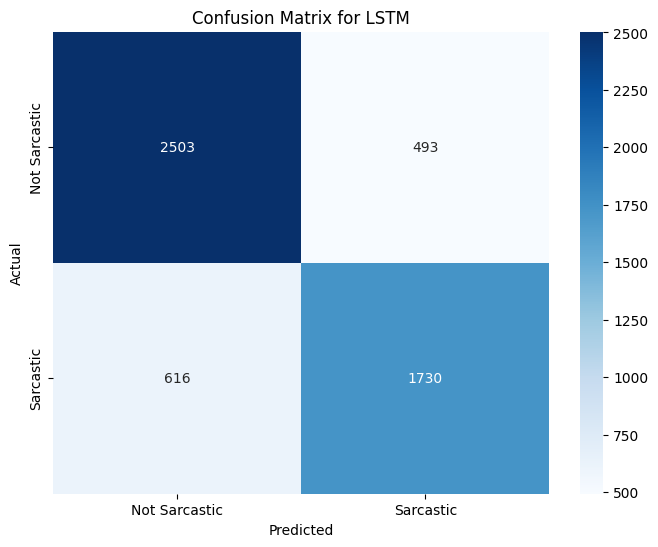

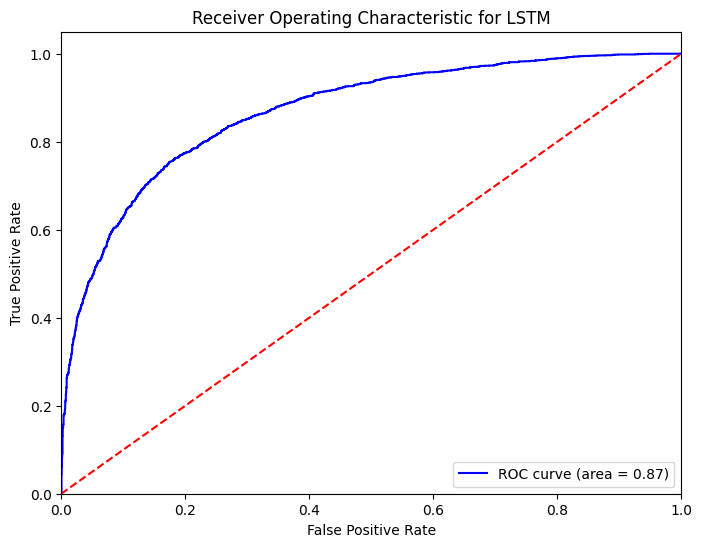

Training Decision Tree Model...
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      2996
           1       0.68      0.67      0.67      2346

    accuracy                           0.72      5342
   macro avg       0.71      0.71      0.71      5342
weighted avg       0.72      0.72      0.72      5342



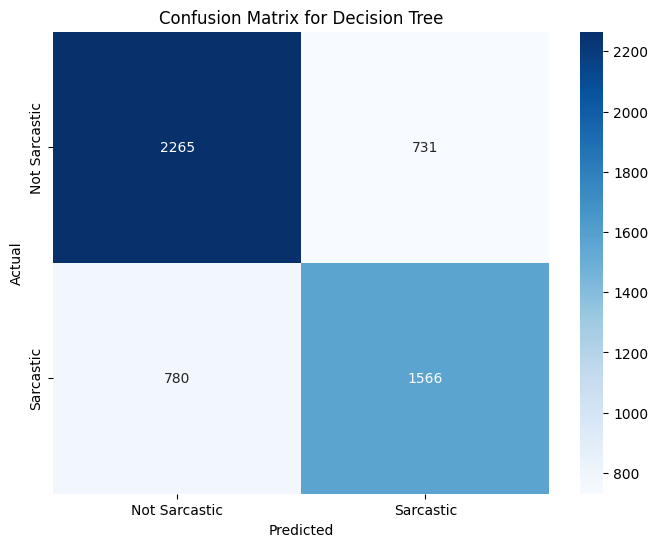

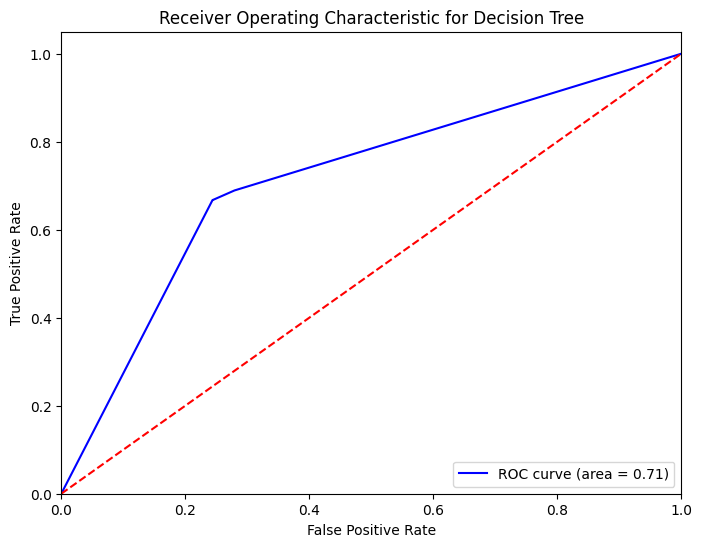

Training SVC Model...
SVC Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      2996
           1       0.77      0.70      0.73      2346

    accuracy                           0.78      5342
   macro avg       0.77      0.77      0.77      5342
weighted avg       0.77      0.78      0.77      5342



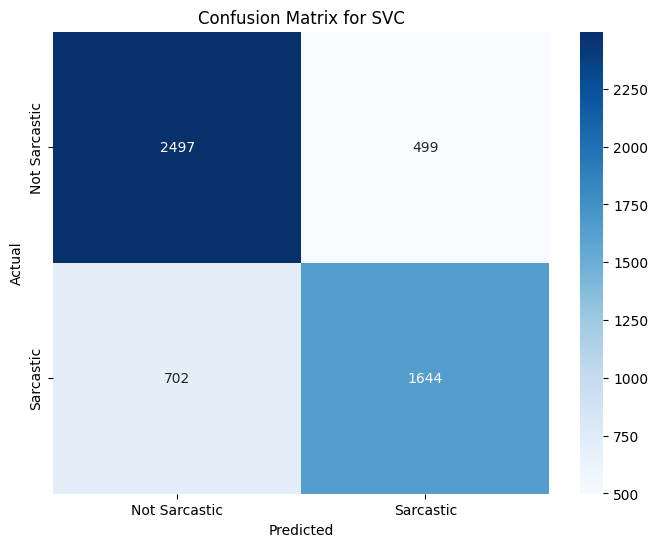

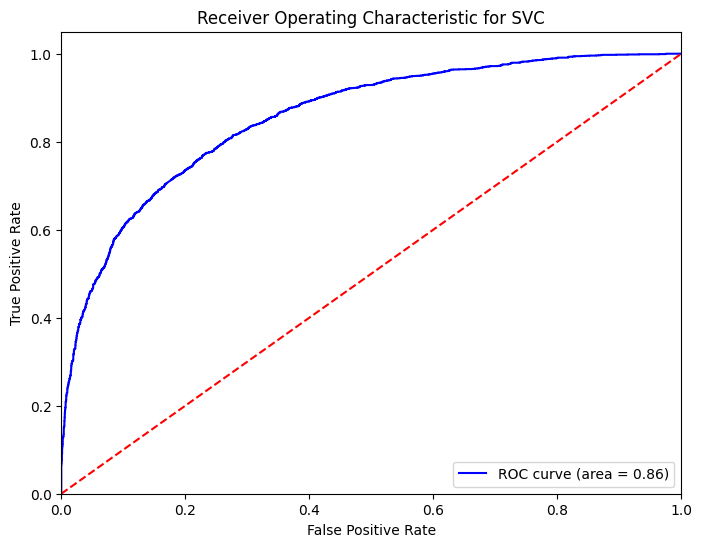

Training KNN Model...
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.67      0.62      2996
           1       0.48      0.40      0.44      2346

    accuracy                           0.55      5342
   macro avg       0.54      0.53      0.53      5342
weighted avg       0.54      0.55      0.54      5342



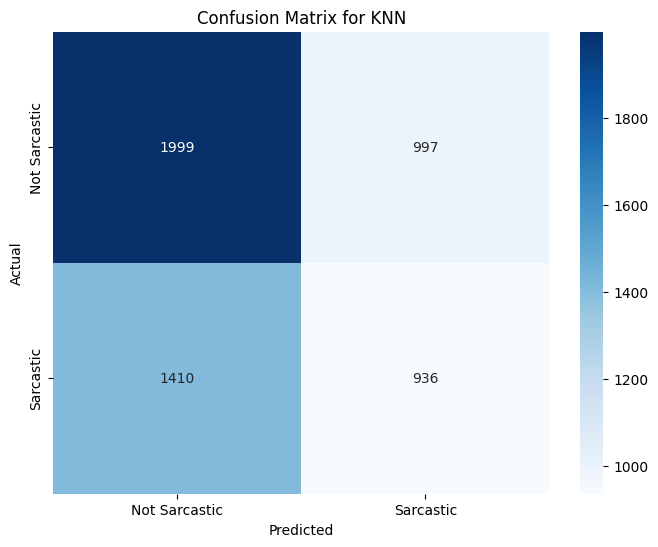

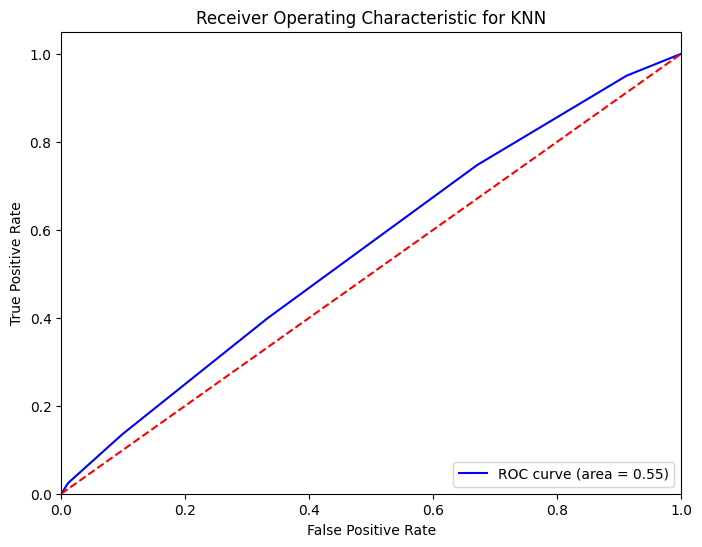

Training Gaussian Naive Bayes Model...
Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.64      0.71      2996
           1       0.63      0.80      0.71      2346

    accuracy                           0.71      5342
   macro avg       0.72      0.72      0.71      5342
weighted avg       0.73      0.71      0.71      5342



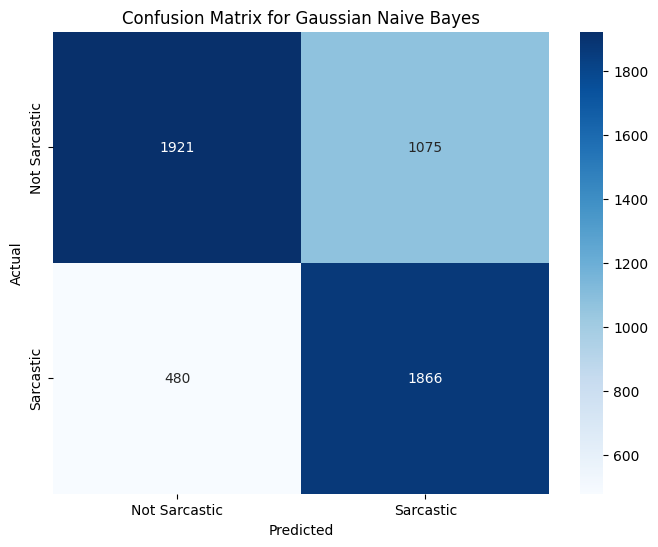

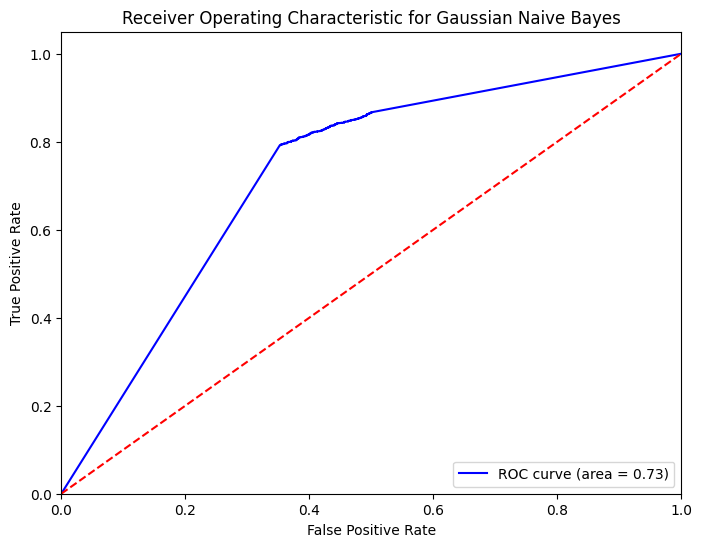

Training Multinomial Naive Bayes Model...
Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      2996
           1       0.79      0.67      0.73      2346

    accuracy                           0.78      5342
   macro avg       0.78      0.77      0.77      5342
weighted avg       0.78      0.78      0.78      5342



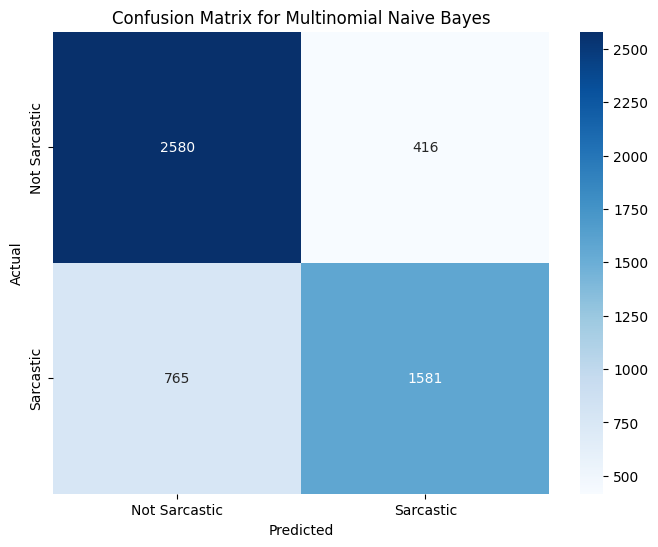

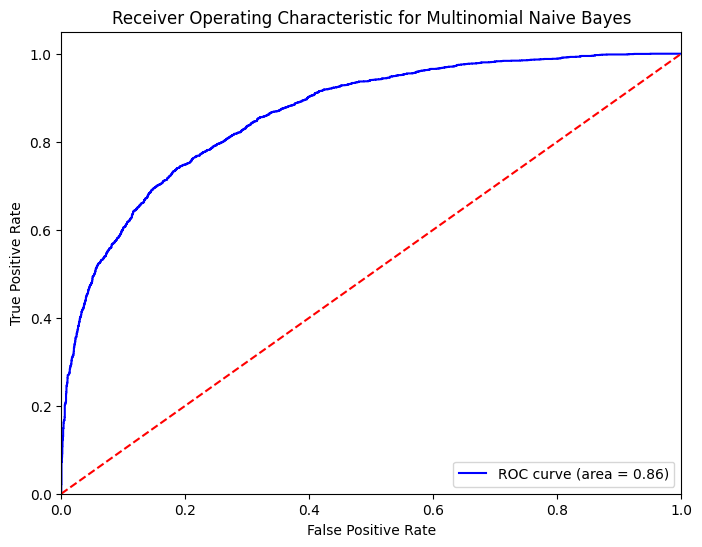

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):

    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    return ' '.join(words)


def preprocess_data(dataset_path):

    df = pd.read_csv(dataset_path)
    df['headline'] = df['headline'].apply(clean_text)
    headlines = df['headline'].values
    labels = df['is_sarcastic'].values

    return headlines, labels

def split_data(headlines, labels):

    return train_test_split(headlines, labels, test_size=0.2, random_state=42)

def vectorize_data(X_train, X_test):

    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    return X_train_tfidf, X_test_tfidf

def train_lstm_model(X_train, X_test, y_train, y_test):

    tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
    tokenizer.fit_on_texts(X_train)
    sequences_train = tokenizer.texts_to_sequences(X_train)
    padded_sequences_train = pad_sequences(sequences_train, maxlen=100)
    sequences_test = tokenizer.texts_to_sequences(X_test)
    padded_sequences_test = pad_sequences(sequences_test, maxlen=100)
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=64, input_length=100))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(padded_sequences_train, y_train, epochs=5, validation_data=(padded_sequences_test, y_test), batch_size=64)
    y_pred_prob = model.predict(padded_sequences_test)
    y_pred = (y_pred_prob > 0.5).astype("int32")

    return y_pred, y_pred_prob

def train_decision_tree_model(X_train, X_test, y_train, y_test):

    X_train_tfidf, X_test_tfidf = vectorize_data(X_train, X_test)
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train_tfidf, y_train)
    y_pred = dt_model.predict(X_test_tfidf)
    y_pred_prob = dt_model.predict_proba(X_test_tfidf)[:, 1]

    return y_pred, y_pred_prob

def train_svc_model(X_train, X_test, y_train, y_test):

    X_train_tfidf, X_test_tfidf = vectorize_data(X_train, X_test)
    svc_model = SVC(kernel='linear', probability=True, random_state=42)
    svc_model.fit(X_train_tfidf, y_train)
    y_pred = svc_model.predict(X_test_tfidf)
    y_pred_prob = svc_model.predict_proba(X_test_tfidf)[:, 1]

    return y_pred, y_pred_prob

def train_knn_model(X_train, X_test, y_train, y_test):

    X_train_tfidf, X_test_tfidf = vectorize_data(X_train, X_test)
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train_tfidf, y_train)
    y_pred = knn_model.predict(X_test_tfidf)
    y_pred_prob = knn_model.predict_proba(X_test_tfidf)[:, 1]

    return y_pred, y_pred_prob

def train_gaussian_nb_model(X_train, X_test, y_train, y_test):

    X_train_tfidf, X_test_tfidf = vectorize_data(X_train, X_test)
    gaussian_nb_model = GaussianNB()
    X_train_tfidf_dense = X_train_tfidf.toarray()
    X_test_tfidf_dense = X_test_tfidf.toarray()
    gaussian_nb_model.fit(X_train_tfidf_dense, y_train)
    y_pred = gaussian_nb_model.predict(X_test_tfidf_dense)
    y_pred_prob = gaussian_nb_model.predict_proba(X_test_tfidf_dense)[:, 1]

    return y_pred, y_pred_prob

def train_multinomial_nb_model(X_train, X_test, y_train, y_test):

    X_train_tfidf, X_test_tfidf = vectorize_data(X_train, X_test)
    multinomial_nb_model = MultinomialNB()
    multinomial_nb_model.fit(X_train_tfidf, y_train)
    y_pred = multinomial_nb_model.predict(X_test_tfidf)
    y_pred_prob = multinomial_nb_model.predict_proba(X_test_tfidf)[:, 1]

    return y_pred, y_pred_prob

def evaluate_model(y_test, y_pred, y_pred_prob, model_name):

    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Sarcastic', 'Sarcastic'], yticklabels=['Not Sarcastic', 'Sarcastic'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    auc_score = roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(auc_score))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

def main(dataset_path):

    headlines, labels = preprocess_data(dataset_path)
    X_train, X_test, y_train, y_test = split_data(headlines, labels)

    print("Training LSTM Model...")
    y_pred, y_pred_prob = train_lstm_model(X_train, X_test, y_train, y_test)
    evaluate_model(y_test, y_pred, y_pred_prob, "LSTM")

    print("Training Decision Tree Model...")
    y_pred, y_pred_prob = train_decision_tree_model(X_train, X_test, y_train, y_test)
    evaluate_model(y_test, y_pred, y_pred_prob, "Decision Tree")

    print("Training SVC Model...")
    y_pred, y_pred_prob = train_svc_model(X_train, X_test, y_train, y_test)
    evaluate_model(y_test, y_pred, y_pred_prob, "SVC")

    print("Training KNN Model...")
    y_pred, y_pred_prob = train_knn_model(X_train, X_test, y_train, y_test)
    evaluate_model(y_test, y_pred, y_pred_prob, "KNN")

    print("Training Gaussian Naive Bayes Model...")
    y_pred, y_pred_prob = train_gaussian_nb_model(X_train, X_test, y_train, y_test)
    evaluate_model(y_test, y_pred, y_pred_prob, "Gaussian Naive Bayes")

    print("Training Multinomial Naive Bayes Model...")
    y_pred, y_pred_prob = train_multinomial_nb_model(X_train, X_test, y_train, y_test)
    evaluate_model(y_test, y_pred, y_pred_prob, "Multinomial Naive Bayes")


data_path = '/content/drive/MyDrive/Dataset/Sarcasm_Headlines_Dataset.csv'
main(data_path)


Hate Span Detection (Checking all other model

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Training Decision Tree Model...
Decision Tree Accuracy: 0.94
Decision Tree Precision: 0.90
Decision Tree Recall: 0.88
Decision Tree F1 Score: 0.89
Decision Tree AUC Score: 0.89


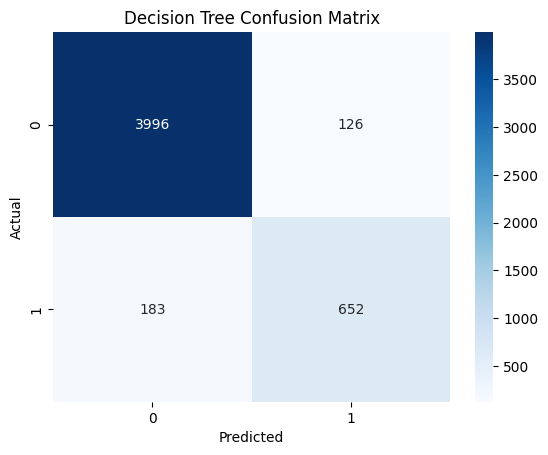

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      4122
           1       0.84      0.78      0.81       835

    accuracy                           0.94      4957
   macro avg       0.90      0.88      0.89      4957
weighted avg       0.94      0.94      0.94      4957



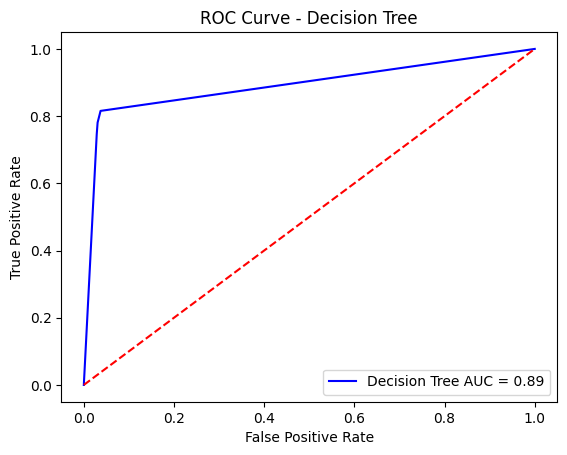

Training SVM Model...
SVM Accuracy: 0.94
SVM Precision: 0.90
SVM Recall: 0.89
SVM F1 Score: 0.90
SVM AUC Score: 0.97


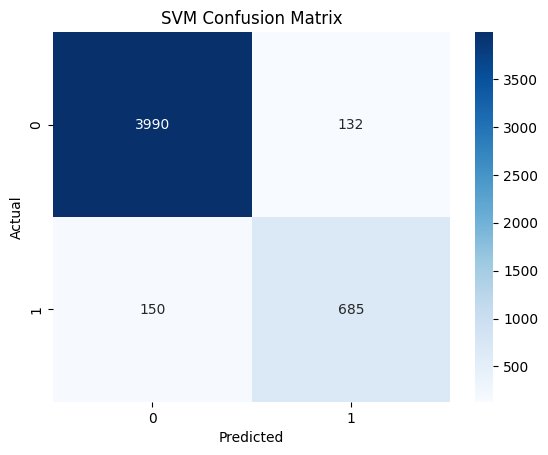

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      4122
           1       0.84      0.82      0.83       835

    accuracy                           0.94      4957
   macro avg       0.90      0.89      0.90      4957
weighted avg       0.94      0.94      0.94      4957



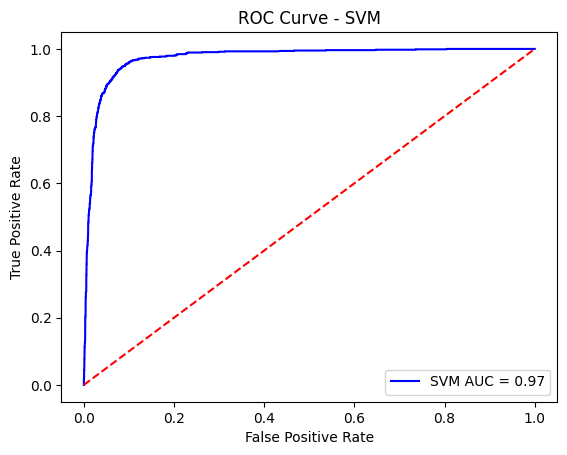

Training KNN Model...
KNN Accuracy: 0.89
KNN Precision: 0.83
KNN Recall: 0.74
KNN F1 Score: 0.77
KNN AUC Score: 0.92


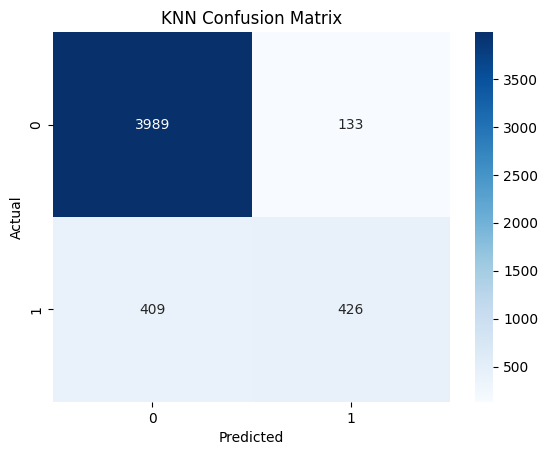

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4122
           1       0.76      0.51      0.61       835

    accuracy                           0.89      4957
   macro avg       0.83      0.74      0.77      4957
weighted avg       0.88      0.89      0.88      4957



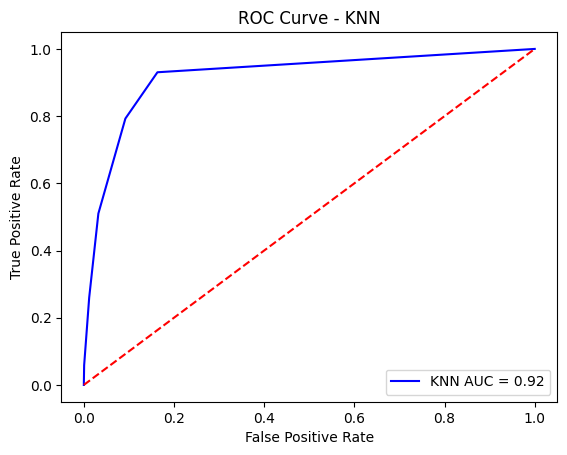

Training Gaussian Naive Bayes Model...
Gaussian Naive Bayes Accuracy: 0.68
Gaussian Naive Bayes Precision: 0.60
Gaussian Naive Bayes Recall: 0.67
Gaussian Naive Bayes F1 Score: 0.60
Gaussian Naive Bayes AUC Score: 0.67


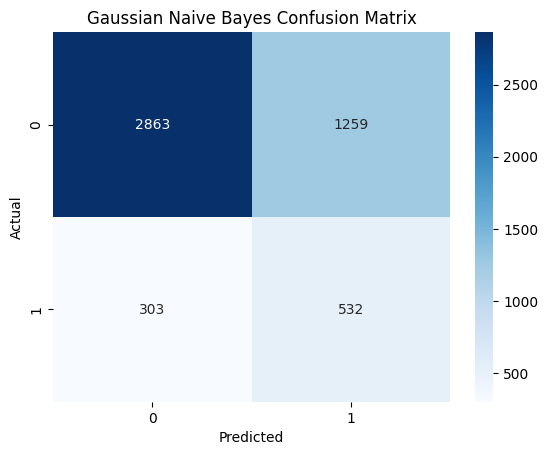

Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.69      0.79      4122
           1       0.30      0.64      0.41       835

    accuracy                           0.68      4957
   macro avg       0.60      0.67      0.60      4957
weighted avg       0.80      0.68      0.72      4957



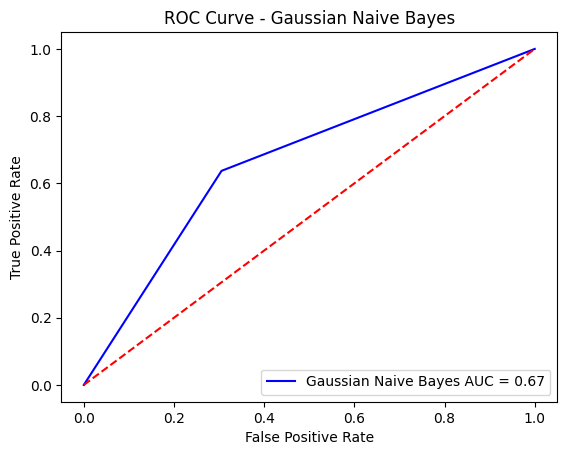

Training Multinomial Naive Bayes Model...
Multinomial Naive Bayes Accuracy: 0.92
Multinomial Naive Bayes Precision: 0.88
Multinomial Naive Bayes Recall: 0.80
Multinomial Naive Bayes F1 Score: 0.83
Multinomial Naive Bayes AUC Score: 0.96


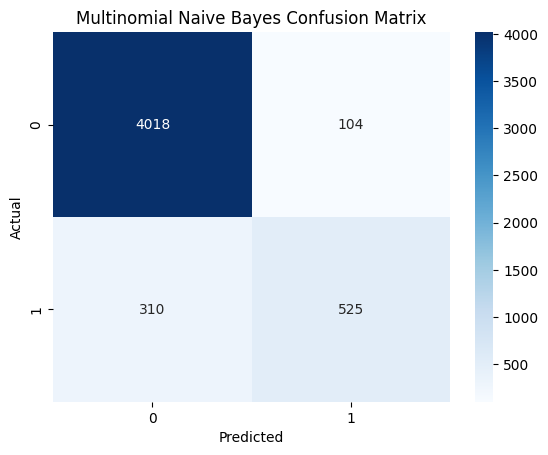

Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4122
           1       0.83      0.63      0.72       835

    accuracy                           0.92      4957
   macro avg       0.88      0.80      0.83      4957
weighted avg       0.91      0.92      0.91      4957



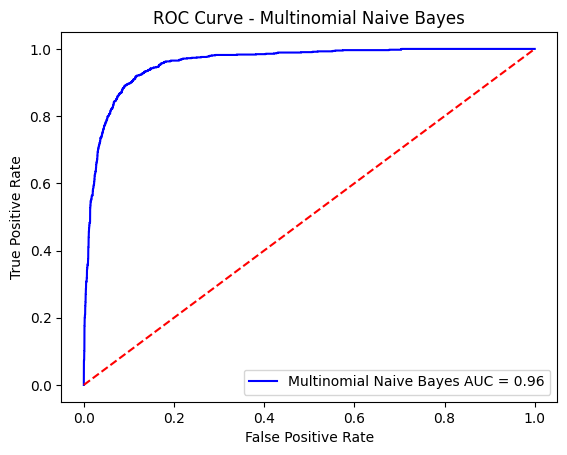

In [ ]:
import pandas as pd
import numpy as np
import praw
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import re
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
stopword = set(stopwords.words("english"))
df = pd.read_csv("/content/drive/MyDrive/Dataset/twitter_data.csv")
df['labels'] = df['class'].map({0: "Hate Speech Detected", 1: "Hate Speech Detected" , 2: "No Hate Speech Detected"})
df = df[['tweet', 'labels']]


def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('http\S+|www.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    return " ".join(text)

df['tweet'] = df['tweet'].apply(clean)
x = np.array(df["tweet"])
y = np.array(df["labels"])
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

def train_decision_tree(X_train, X_test, y_train, y_test):

    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    y_prob = dt.predict_proba(X_test)[:, 1]

    return y_pred, y_prob

def train_svm(X_train, X_test, y_train, y_test):

    svm = SVC(kernel='linear', probability=True)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    y_prob = svm.predict_proba(X_test)[:, 1]

    return y_pred, y_prob

def train_knn(X_train, X_test, y_train, y_test):

    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_prob = knn.predict_proba(X_test)[:, 1]

    return y_pred, y_prob

def train_gaussian_nb(X_train, X_test, y_train, y_test):

    nb = GaussianNB()
    X_train_dense = X_train.toarray()
    X_test_dense = X_test.toarray()
    nb.fit(X_train_dense, y_train)
    y_pred = nb.predict(X_test_dense)
    y_prob = nb.predict_proba(X_test_dense)[:, 1]

    return y_pred, y_prob

def train_multinomial_nb(X_train, X_test, y_train, y_test):

    mnb = MultinomialNB()
    mnb.fit(X_train, y_train)
    y_pred = mnb.predict(X_test)
    y_prob = mnb.predict_proba(X_test)[:, 1]

    return y_pred, y_prob

def evaluate_model(y_test, y_pred, y_prob, model_name):

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    auc_score = roc_auc_score(y_test, y_prob)
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(f"{model_name} Precision: {precision:.2f}")
    print(f"{model_name} Recall: {recall:.2f}")
    print(f"{model_name} F1 Score: {f1:.2f}")
    print(f"{model_name} AUC Score: {auc_score:.2f}")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, color='blue',label=f"{model_name} AUC = {auc_score:.2f}")
    plt.plot([0, 1], [0, 1], color='red',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

def main():

    print("Training Decision Tree Model...")
    y_pred_dt, y_prob_dt = train_decision_tree(X_train, X_test, y_train, y_test)
    evaluate_model(y_test, y_pred_dt, y_prob_dt, "Decision Tree")

    print("Training SVM Model...")
    y_pred_svm, y_prob_svm = train_svm(X_train, X_test, y_train, y_test)
    evaluate_model(y_test, y_pred_svm, y_prob_svm, "SVM")

    print("Training KNN Model...")
    y_pred_knn, y_prob_knn = train_knn(X_train, X_test, y_train, y_test)
    evaluate_model(y_test, y_pred_knn, y_prob_knn, "KNN")

    print("Training Gaussian Naive Bayes Model...")
    y_pred_nb, y_prob_nb = train_gaussian_nb(X_train, X_test, y_train, y_test)
    evaluate_model(y_test, y_pred_nb, y_prob_nb, "Gaussian Naive Bayes")

    print("Training Multinomial Naive Bayes Model...")
    y_pred_mnb, y_prob_mnb = train_multinomial_nb(X_train, X_test, y_train, y_test)
    evaluate_model(y_test, y_pred_mnb, y_prob_mnb, "Multinomial Naive Bayes")

main()


In [ ]:
!pip install imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import re
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
df = pd.read_csv("/content/drive/MyDrive/Dataset/twitter_data.csv")
df['labels'] = df['class'].map({0: "Hate Speech Detected", 1: "Hate Speech Detected", 2: "No Hate Speech Detected"})
df = df[['tweet', 'labels']]
lemmatizer = WordNetLemmatizer()
stopword = set(stopwords.words("english"))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('http\S+|www.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [lemmatizer.lemmatize(word) for word in text.split(' ') if word not in stopword]
    return " ".join(text)

df['cleaned_tweet'] = df['tweet'].apply(clean)

hate_speech_samples = df[df['labels'] == "Hate Speech Detected"]['cleaned_tweet']
non_hate_speech_samples = df[df['labels'] == "No Hate Speech Detected"]['cleaned_tweet']

hate_speech_words = Counter(word for text in hate_speech_samples for word in text.split())
non_hate_speech_words = Counter(word for text in non_hate_speech_samples for word in text.split())

common_hate_speech_words = hate_speech_words.most_common(90)
common_non_hate_speech_words = non_hate_speech_words.most_common(90)
hate_speech_set = set(word for word, _ in common_hate_speech_words)
non_hate_speech_set = set(word for word, _ in common_non_hate_speech_words)

unique_hate_speech_words = hate_speech_set - non_hate_speech_set

if len(unique_hate_speech_words) < 50:
    additional_words = [word for word, _ in common_hate_speech_words if word not in unique_hate_speech_words]
    unique_hate_speech_words = unique_hate_speech_words.union(set(additional_words[:50 - len(unique_hate_speech_words)]))

print("Unique Hate Speech Words:", unique_hate_speech_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Unique Hate Speech Words: {'life', 'yall', 'cunt', 'fucking', 'ya', 'bitch', 'lmao', 'bad', 'gonna', 'fuck', 'get', 'come', 'wit', 'damn', 'lil', 'dat', 'like', 'faggot', 'aint', 'cause', 'hoe', 'money', 'always', 'stop', 'yo', 'rt', 'eat', 'real', 'little', 'ill', 'nigga', 'tell', 'u', 'give', 'dont', 'dumb', 'wanna', 'retarded', 'fag', 'im', 'bout', 'as', 'ugly', 'dick', 'pussy', 'nigger', 'fuckin', 'shit', 'niggah', 'gotta'}


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter

nltk.download('stopwords')
nltk.download('wordnet')

url = '/content/drive/MyDrive/Dataset/Sarcasm_Headlines_Dataset.csv'
df = pd.read_csv(url)

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.lower().split()
    stop_words = set(stopwords.words('english'))
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return cleaned_words

df['cleaned_text'] = df['headline'].apply(preprocess_text)

sarcastic_samples = df[df['is_sarcastic'] == 1]['cleaned_text']
non_sarcastic_samples = df[df['is_sarcastic'] == 0]['cleaned_text']

sarcastic_words = Counter(word for text in sarcastic_samples for word in text)
non_sarcastic_words = Counter(word for text in non_sarcastic_samples for word in text)

common_sarcastic_words = sarcastic_words.most_common(90)
common_non_sarcastic_words = non_sarcastic_words.most_common(90)

sarcastic_set = set(word for word, _ in common_sarcastic_words)
non_sarcastic_set = set(word for word, _ in common_non_sarcastic_words)

unique_sarcastic_words = sarcastic_set - non_sarcastic_set

if len(unique_sarcastic_words) < 50:
    additional_words = [word for word, _ in common_sarcastic_words if word not in unique_sarcastic_words]
    unique_sarcastic_words = unique_sarcastic_words.union(set(additional_words[:50 - len(unique_sarcastic_words)]))

print("Unique Sarcastic Words (at least 50):", unique_sarcastic_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Unique Sarcastic Words (at least 50): {'little', 'new', 'employee', 'job', 'human', 'report', 'self', 'tell', 'local', 'good', 'every', 'announces', 'study', 'dad', 'couple', 'get', 'parent', 'god', 'never', 'last', 'come', 'woman', 'day', 'million', 'doesnt', 'teen', 'entire', 'party', 'yearold', 'see', 'getting', 'friend', 'one', 'he', 'man', 'find', 'cant', 'office', 'hour', 'bush', 'area', 'around', 'enough', 'guy', 'minute', 'work', 'introduces', 'american', 'going', 'nation'}


In [ ]:
file_path = '/content/drive/MyDrive/Dataset/sarcasm_hatespan_app.py'


with open(file_path, 'w') as f:
    f.write("""
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
import nltk
import streamlit as st
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE  # Import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
# Download stopwords and WordNet
nltk.download('stopwords')
nltk.download('wordnet')
stopword = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
import pandas as pd
import numpy as np
import re
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
unique_sarcastic_words=['little', 'new', 'employee', 'job', 'human', 'report', 'self', 'tell', 'local', 'good', 'every', 'announces', 'study', 'dad', 'couple', 'get', 'parent', 'god', 'never', 'last', 'come', 'woman', 'day', 'million', 'doesnt', 'teen', 'entire', 'party', 'yearold', 'see', 'getting', 'friend', 'one', 'he', 'man', 'find', 'cant', 'office', 'hour', 'bush', 'area', 'around', 'enough', 'guy', 'minute', 'work', 'introduces', 'american', 'going', 'nation']
unique_hate_speech_words=['life', 'yall', 'cunt', 'fucking', 'ya', 'bitch', 'lmao', 'bad', 'gonna', 'fuck', 'get', 'come', 'wit', 'damn', 'lil', 'dat', 'like', 'faggot', 'aint', 'cause', 'hoe', 'money', 'always', 'stop', 'yo', 'rt', 'eat', 'real', 'little', 'ill', 'nigga', 'tell', 'u', 'give', 'dont', 'dumb', 'wanna', 'retarded', 'fag', 'im', 'bout', 'as', 'ugly', 'dick', 'pussy', 'nigger', 'fuckin', 'shit', 'niggah', 'gotta']
# Load and clean dataset for sarcasm
df_sarcasm = pd.read_csv("/content/drive/MyDrive/Dataset/Sarcasm_Headlines_Dataset.csv")
df_sarcasm['headline'] = df_sarcasm['headline'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', str(x).lower()))
df_sarcasm['headline'] = df_sarcasm['headline'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split() if word not in stopword]))

# Load and clean dataset for hate span
df_hate_span = pd.read_csv("/content/drive/MyDrive/Dataset/twitter_data.csv")
df_hate_span['tweet'] = df_hate_span['tweet'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', str(x).lower()))
df_hate_span['tweet'] = df_hate_span['tweet'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split() if word not in stopword]))

# Map labels: 0 and 1 -> Positive class; 2 -> Negative class
df_hate_span['labels'] = df_hate_span['class'].map({0: 1, 1: 1, 2: 0})  # 0 for positive (0 and 1), 1 for negative (2)
y_hate_span = df_hate_span['labels']

# Vectorize data using the same vectorizer for both datasets
vectorizer = CountVectorizer()
X_sarcasm = vectorizer.fit_transform(df_sarcasm['headline'])
X_hate_span = vectorizer.transform(df_hate_span['tweet'])  # Use transform to ensure the same feature set
y_sarcasm = df_sarcasm['is_sarcastic']

# Split data before applying SMOTE
X_train_sarcasm, X_test_sarcasm, y_train_sarcasm, y_test_sarcasm = train_test_split(X_sarcasm, y_sarcasm, test_size=0.2, random_state=42)
X_train_hate_span, X_test_hate_span, y_train_hate_span, y_test_hate_span = train_test_split(X_hate_span, y_hate_span, test_size=0.2, random_state=42)

# Apply SMOTE to the hate span training set
smote = SMOTE(random_state=42)
X_train_hate_span_resampled, y_train_hate_span_resampled = smote.fit_resample(X_train_hate_span, y_train_hate_span)

# Train models
model_sarcasm = MultinomialNB()
model_hate_span = SVC(kernel='linear', probability=True)

model_sarcasm.fit(X_train_sarcasm, y_train_sarcasm)
model_hate_span.fit(X_train_hate_span_resampled, y_train_hate_span_resampled)  # Use resampled data

# Get accuracy and AUC scores
accuracy_sarcasm = accuracy_score(y_test_sarcasm, model_sarcasm.predict(X_test_sarcasm))
accuracy_hate_span = accuracy_score(y_test_hate_span, model_hate_span.predict(X_test_hate_span))

# Calculate AUC scores
auc_sarcasm = roc_auc_score(y_test_sarcasm, model_sarcasm.predict_proba(X_test_sarcasm)[:, 1])
auc_hate_span = roc_auc_score(y_test_hate_span, model_hate_span.predict_proba(X_test_hate_span)[:, 1])

precision_sarcasm = precision_score(y_test_sarcasm, model_sarcasm.predict(X_test_sarcasm),average='macro')
precision_hate_span = precision_score(y_test_hate_span, model_hate_span.predict(X_test_hate_span),average='macro')

recall_sarcasm = recall_score(y_test_sarcasm, model_sarcasm.predict(X_test_sarcasm),average='macro')
recall_hate_span = recall_score(y_test_hate_span, model_hate_span.predict(X_test_hate_span),average='macro')

f1_score_sarcasm = f1_score(y_test_sarcasm, model_sarcasm.predict(X_test_sarcasm),average='macro')
f1_score_hate_span = f1_score(y_test_hate_span, model_hate_span.predict(X_test_hate_span),average='macro')

classification_sarcasm = classification_report(y_test_sarcasm, model_sarcasm.predict(X_test_sarcasm))
classification_hate_span = classification_report(y_test_hate_span, model_hate_span.predict(X_test_hate_span))


def plot_metrics(y_test, y_pred, y_prob, model_name):
    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax[0])
    ax[0].set_xlabel("Predicted")
    ax[0].set_ylabel("Actual")
    ax[0].set_title(f"{model_name} Confusion Matrix")

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    ax[1].plot(fpr, tpr, color='blue', label=f"AUC = {auc_score:.2f}")
    ax[1].plot([0, 1], [0, 1], color='red', linestyle='--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title(f'ROC Curve - {model_name}')
    ax[1].legend(loc='lower right')

    st.pyplot(fig)

# Streamlit app title
st.title("Sarcasm and Hate Span Detection Application")
st.write(f"**Using the best model for Sarcasm Detection: Multinomial Naive Bayes (Accuracy: {accuracy_sarcasm:.2f}, Precision :{precision_sarcasm:.2f}, Recall :{recall_sarcasm:.2f}, F1 Score :{f1_score_sarcasm:.2f}, AUC: {auc_sarcasm:.2f})**")
st.write("**Sarcasm Detection Metrics**")
sarcasm_metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "AUC"],
    "Value": [
        accuracy_sarcasm,
        precision_sarcasm,
        recall_sarcasm,
        f1_score_sarcasm,
        auc_sarcasm
    ]
}
df_sarcasm = pd.DataFrame(sarcasm_metrics)
st.table(df_sarcasm)

# Plot metrics for sarcasm detection
y_pred_sarcasm = model_sarcasm.predict(X_test_sarcasm)
y_prob_sarcasm = model_sarcasm.predict_proba(X_test_sarcasm)[:, 1]
plot_metrics(y_test_sarcasm, y_pred_sarcasm, y_prob_sarcasm, "Sarcasm Detection")

# Hate Span Classification Report
st.write("**Hate Span Detection Metrics**")
hate_span_metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "AUC"],
    "Value": [
        accuracy_hate_span,
        precision_hate_span,
        recall_hate_span,
        f1_score_hate_span,
        auc_hate_span
    ]
}
df_hate_span = pd.DataFrame(hate_span_metrics)
st.table(df_hate_span)

# Plot metrics for hate span detection
y_pred_hate_span = model_hate_span.predict(X_test_hate_span)
y_prob_hate_span = model_hate_span.decision_function(X_test_hate_span)  # SVM requires `decision_function` for ROC
plot_metrics(y_test_hate_span, y_pred_hate_span, y_prob_hate_span, "Hate Span Detection")

def normalize_repeated_characters(text):
    return re.sub(r'(.)\1{2,}', r'\1', text)  # Replace three or more repeated characters with a single instance

# Prediction function
def analyze_text(input_text):
    input_text = normalize_repeated_characters(input_text)
    input_text_cleaned = re.sub('[%s]' % re.escape(string.punctuation), '', input_text.lower())  # Remove punctuation
    input_text_cleaned = ' '.join([lemmatizer.lemmatize(word) for word in input_text_cleaned.split() if word not in stopword])
    input_vectorized = vectorizer.transform([input_text_cleaned])  # Use the same vectorizer for input

    prediction_sarcasm = model_sarcasm.predict(input_vectorized)[0]
    result_sarcasm = "Sarcastic" if prediction_sarcasm == 1 else "Not Sarcastic"

    prediction_hate_span = model_hate_span.predict(input_vectorized)[0]
    result_hate_span = "Yes" if prediction_hate_span == 1 else "No"

    # Extract sarcasm and hate speech words
    sarcasm_words = [word for word in input_text_cleaned.split() if word in unique_sarcastic_words]
    hate_speech_words = [word for word in input_text_cleaned.split() if word in unique_hate_speech_words]

    st.write(f"**Is it sarcastic? :** {result_sarcasm}")
    st.write(f"**Contains hate speech? :** {result_hate_span}")

    if result_sarcasm == "Sarcastic":
        st.write(f"**Words indicating sarcasm:** {', '.join(sarcasm_words)}")

    if result_hate_span == "Yes":
        st.write(f"**Words indicating hate speech:** {', '.join(hate_speech_words)}")

# Get user input and run analysis
input_text = st.text_input("Enter a sentence to check if it is sarcastic and contains hate speech:")
if input_text:
    analyze_text(input_text)
    """)

print(f"Streamlit app saved to {file_path}")

Streamlit app saved to /content/drive/MyDrive/Dataset/sarcasm_hatespan_app.py


In [ ]:
!pip install streamlit pyngrok pandas scikit-learn tensorflow nltk matplotlib seaborn
!pip install Flask pyngrok

In [ ]:
!ngrok authtoken 2n1csnEsHjazGCShFdpxDX0RcYv_7CqAgmjBHpqg8LaV5EoYf

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from flask import Flask, render_template_string
from pyngrok import ngrok
import os
import threading
import requests
import time

app = Flask(__name__)

def run_streamlit():
    os.system("streamlit run /content/drive/MyDrive/Dataset/sarcasm_hatespan_app.py --server.port 8502 &")

def wait_for_streamlit(public_url):
    while True:
        try:
            response = requests.get(public_url)
            if response.status_code == 200:
                print("Streamlit app is up and running!")
                break
        except requests.ConnectionError:
            print("Waiting for Streamlit to start...")
            time.sleep(1)

@app.route('/')
def index():
    return render_template_string("""
        <!doctype html>
        <title>Sarcasm Detection App</title>
        <h1>Sarcasm Detection App</h1>
        <p>The Streamlit app is running at:</p>
        <a href="{{ url }}" target="_blank">{{ url }}</a>
    """, url=public_url)

if __name__ == '__main__':
    public_url = ngrok.connect(8502).public_url
    print(f"Streamlit app is running at: {public_url}")
    threading.Thread(target=run_streamlit).start()

    wait_for_streamlit(public_url)

    app.run(port=5000, debug=True)


Streamlit app is running at: https://e81c-35-201-189-230.ngrok-free.app


Streamlit app is up and running!
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (inotify)
